# **Introduction**
We are going to run the exact same experiment like **MNIST**, but this time with the **Fashion MNIST** dataset.

The rules are the same:
* **Input**: 28x28 Grayscale Image
* **Output**: One of 10 categories (T-shirt, Trouser, etc.)

#### **Step 1: Load & Prepare Data**
The data comes from `keras.datasets.fashion_mnist`. We also need to define the `class_names` becuase the data only gives us numbers (0-9), and we need to know that "9" means *"Ankle Boot"*.

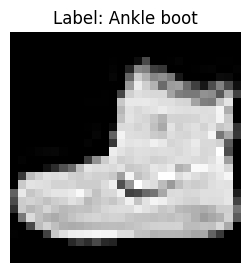

Training Data Shape: (60000, 28, 28)


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


# 1. Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 2. Normalize pixel values (0-255 -> 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Define Label Names (0=T-shirt/top, 1=Trouser, etc.)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 4. Check one image to make sure it loaded correctly
plt.figure(figsize=(3,3))
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {class_names[y_train[0]]}")
plt.axis('off')
plt.show()

print(f"Training Data Shape: {x_train.shape}")